Mục tiêu: giảm số chiều của tập dữ liệu Iris để có visualize dễ dàng hơn.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
# Iris data is four-dimensional. (tứ với 4 features)

Mục tiêu của giảm chiều dữ liệu là liệu có một cách biểu diễn phù hợp mà thấp chiều hơn mà giữ lại được những tính trạng quan trọng của dữ liệu.

Thông thường, giảm chiều dữ liệu được sử dụng để hồ trợ cho việc hình dung dữ liệu.

Ta sẽ dử dụng PCA để giảm chiều dữ liệu. Đây là một thuật toán giảm chiều dữ liệu với tốc độ nhanh. 

In [9]:
# we will ask the model to return two components - two-dimensional representation of the data.

In [10]:
# extract features matrix and target array from dataframe
X_iris = iris.drop('species', axis = 1)  # loại bỏ theo cột
y_iris = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


Với PCA thì ta không cần chia tập training set và test set.

In [13]:
from sklearn.decomposition import PCA      # 1. choose the model class 
model = PCA(n_components = 2)              # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                          # 3. fit to data. notice y is not specified!
X_2D = model.transform(X_iris)             # 4. Transform the data to two dimensions

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


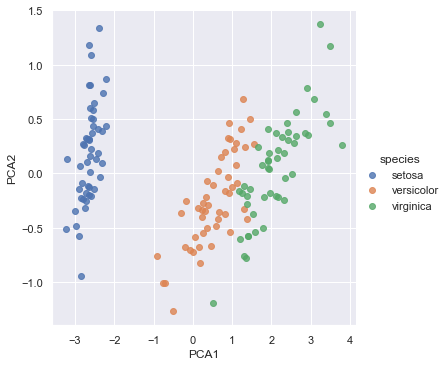

In [14]:
# plot the results
# insert the results into the original Iris DataFrame, and use Seaborn’s lmplot to show the results
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

We see that in the two-dimensional representation, the species are fairly well separated, **even though the PCA algorithm had no knowledge of the species labels!** This
indicates to us that a relatively straightforward classification will probably be effective
on the dataset.